In [ ]:
import tensorflow as tf
import tensorflow_datasets as tfds

# Load dataset (with train/validation/test splits)
(ds_train, ds_val, ds_test), ds_info = tfds.load(
    'rock_paper_scissors',
    split=['train[:80%]', 'train[80%:90%]', 'train[90%:]'],  # manual split
    as_supervised=True,  # (image, label) format
    with_info=True
)

print(ds_info)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/rock_paper_scissors/incomplete.6PGS13_3.0.0/rock_paper_scissors-train.tfre…

Generating test examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/rock_paper_scissors/incomplete.6PGS13_3.0.0/rock_paper_scissors-test.tfrec…

Dataset rock_paper_scissors downloaded and prepared to /root/tensorflow_datasets/rock_paper_scissors/3.0.0. Subsequent calls will reuse this data.
tfds.core.DatasetInfo(
    name='rock_paper_scissors',
    full_name='rock_paper_scissors/3.0.0',
    description="""
    Images of hands playing rock, paper, scissor game.
    """,
    homepage='http://laurencemoroney.com/rock-paper-scissors-dataset',
    data_dir='/root/tensorflow_datasets/rock_paper_scissors/3.0.0',
    file_format=tfrecord,
    download_size=219.53 MiB,
    dataset_size=219.23 MiB,
    features=FeaturesDict({
        'image': Image(shape=(300, 300, 3), dtype=uint8),
        'label': ClassLabel(shape=(), dtype=int64, num_classes=3),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    nondeterministic_order=False,
    splits={
        'test': <SplitInfo num_examples=372, num_shards=1>,
        'train': <SplitInfo num_examples=2520, num_shards=2>,
    },
    citation="""@ONLINE {rps,
    author 

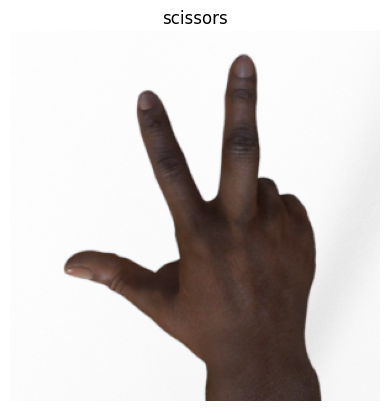

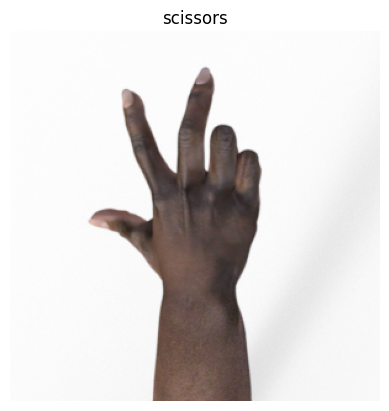

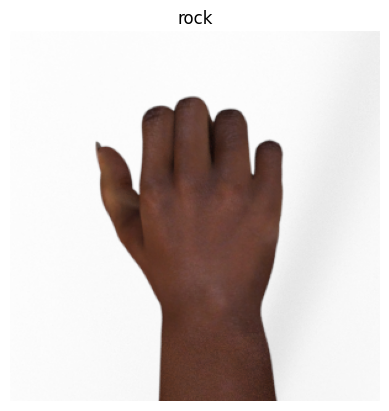

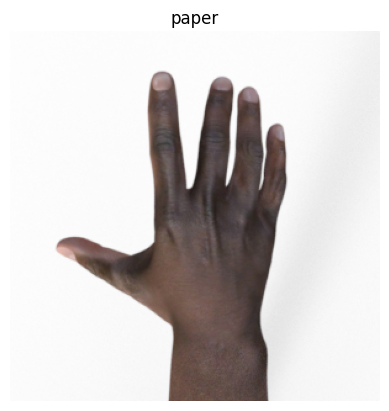

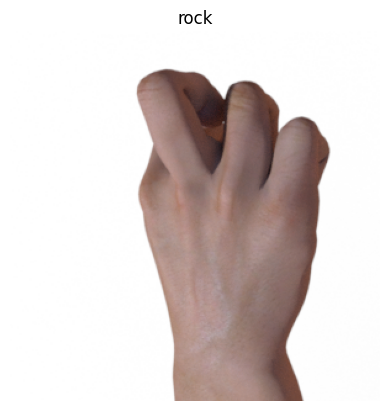

In [ ]:
import matplotlib.pyplot as plt

for image, label in ds_train.take(5):
    plt.imshow(image)
    plt.title(ds_info.features['label'].int2str(label))
    plt.axis('off')
    plt.show()

In [ ]:
import tensorflow_datasets as tfds
import tensorflow as tf
import os
from PIL import Image
import random
import numpy as np
from io import BytesIO
# Plotting and dealing with images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
# Interactive widgets
from ipywidgets import widgets

# Load the dataset
splits = ['train', 'test']
data = tfds.load('rock_paper_scissors', split=splits, as_supervised=True)

# Label names
label_names = ['rock', 'paper', 'scissors']

# Base directory for saving
base_dir = '/content/rps_dataset'
os.makedirs(base_dir, exist_ok=True)

for split_name, split_data in zip(splits, data):
    for image, label in tfds.as_numpy(split_data):
        # Convert tensor -> PIL image
        img = Image.fromarray(image)
        label_str = label_names[label]

        # Save path
        split_dir = os.path.join(base_dir, split_name, label_str)
        os.makedirs(split_dir, exist_ok=True)

        img_id = len(os.listdir(split_dir)) + 1
        img.save(os.path.join(split_dir, f'{img_id}.png'))

print("Dataset extracted to", base_dir)


Dataset extracted to /content/rps_dataset


In [ ]:
BASE_DIR = '/content/rps_dataset/train'

rock_dir = os.path.join(BASE_DIR, 'rock')
paper_dir = os.path.join(BASE_DIR, 'paper')
scissors_dir = os.path.join(BASE_DIR, 'scissors')

print(f'total training rock images: {len(os.listdir(rock_dir))}')
print(f'total training paper images: {len(os.listdir(paper_dir))}')
print(f'total training scissors images: {len(os.listdir(scissors_dir))}')

rock_files = os.listdir(rock_dir)
paper_files = os.listdir(paper_dir)
scissors_files = os.listdir(scissors_dir)

print()
print(f"5 files in the rock subdir: {rock_files[:5]}")
print(f"5 files in the paper subdir: {paper_files[:5]}")
print(f"5 files in the scissors subdir: {scissors_files[:5]}")

total training rock images: 840
total training paper images: 840
total training scissors images: 840

5 files in the rock subdir: ['454.png', '646.png', '281.png', '42.png', '729.png']
5 files in the paper subdir: ['454.png', '646.png', '281.png', '42.png', '729.png']
5 files in the scissors subdir: ['454.png', '646.png', '281.png', '42.png', '729.png']


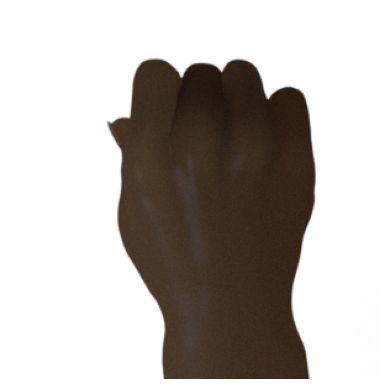

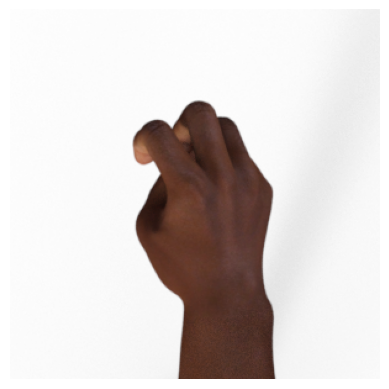

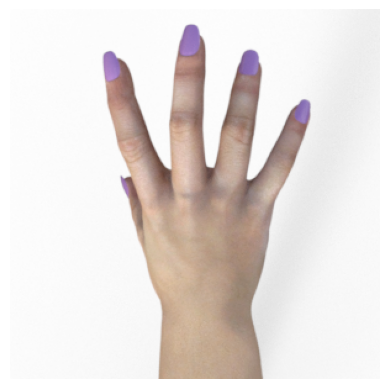

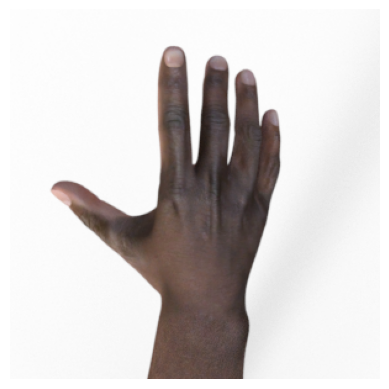

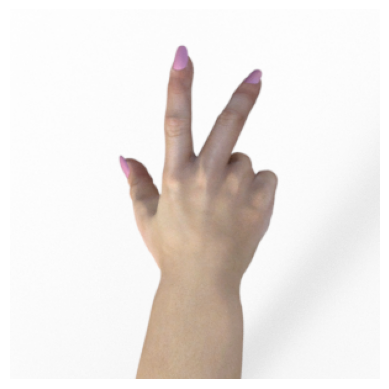

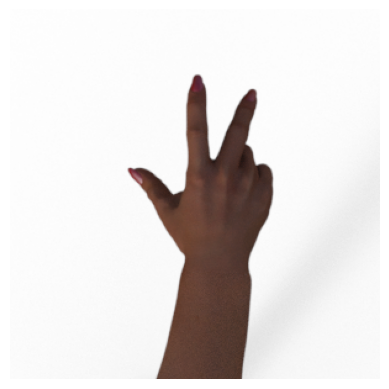

In [ ]:
next_rock = [os.path.join(rock_dir, fname)
             for fname in random.sample(rock_files, k=2)]
next_paper = [os.path.join(paper_dir, fname)
              for fname in random.sample(paper_files, k=2)]
next_scissors = [os.path.join(scissors_dir, fname)
                 for fname in random.sample(scissors_files, k=2)]

for i, img_path in enumerate(next_rock+next_paper+next_scissors):
    img = mpimg.imread(img_path)
    plt.imshow(img)
    plt.axis('Off')
    plt.show()

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.Input(shape=(150, 150, 3)),
    # Rescale the image. Note the input shape is the desired size of the image: 150x150 with 3 bytes for color
    tf.keras.layers.Rescaling(1./255),
    # This is the first convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

In [ ]:
# Print the model summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)           │ (None, 150, 150, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 148, 148, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 15, 15, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     3,211,776 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │         1,539 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,473,475 (13.25 MB)

 Trainable params: 3,473,475 (13.25 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
TRAINING_DIR = "/content/rps_dataset/train"
VALIDATION_DIR = "/content/rps_dataset/test"

# Instantiate the training dataset
train_dataset = tf.keras.utils.image_dataset_from_directory(
    TRAINING_DIR,
    image_size=(150, 150),
    batch_size=32,
    label_mode='categorical'
    )

# Instantiate the validation dataset
validation_dataset = tf.keras.utils.image_dataset_from_directory(
    VALIDATION_DIR,
    image_size=(150, 150),
    batch_size=32,
    label_mode='categorical'
    )

# Optimize the datasets for training
SHUFFLE_BUFFER_SIZE = 1000
PREFETCH_BUFFER_SIZE = tf.data.AUTOTUNE

train_dataset_final = (train_dataset
                       .cache()
                       .shuffle(SHUFFLE_BUFFER_SIZE)
                       .prefetch(PREFETCH_BUFFER_SIZE)
                       )

validation_dataset_final = (validation_dataset
                            .cache()
                            .prefetch(PREFETCH_BUFFER_SIZE)
                            )

Found 2520 files belonging to 3 classes.
Found 372 files belonging to 3 classes.


In [ ]:
# Create a model with data augmentation layers
data_augmentation = tf.keras.Sequential([
    tf.keras.Input(shape=(150, 150, 3)),
    tf.keras.layers.RandomFlip("horizontal"),
    tf.keras.layers.RandomRotation(0.4),
    tf.keras.layers.RandomTranslation(0.2,0.2),
    tf.keras.layers.RandomContrast(0.4),
    tf.keras.layers.RandomZoom(0.2)
    ])

# Attach the data augmentation model to the base model
model_with_aug = tf.keras.models.Sequential([
    data_augmentation,
    model
])

In [ ]:
# Set the training parameters
model_with_aug.compile(loss = 'categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [ ]:
# Train the model
history = model_with_aug.fit(
    train_dataset_final,
    epochs=20,
    validation_data = validation_dataset_final,
    verbose = 1
)

Epoch 1/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 16s 51ms/step - accuracy: 0.3359 - loss: 1.4438 - val_accuracy: 0.3333 - val_loss: 1.0987
Epoch 2/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 9s 34ms/step - accuracy: 0.3556 - loss: 1.0977 - val_accuracy: 0.4651 - val_loss: 1.0666
Epoch 3/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 0.4109 - loss: 1.0695 - val_accuracy: 0.8011 - val_loss: 0.7406
Epoch 4/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.5337 - loss: 0.9711 - val_accuracy: 0.7554 - val_loss: 0.5669
Epoch 5/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - accuracy: 0.6368 - loss: 0.7806 - val_accuracy: 0.7742 - val_loss: 0.4377
Epoch 6/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.7178 - loss: 0.6480 - val_accuracy: 0.8817 - val_loss: 0.3945
Epoch 7/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 0.7709 - loss: 0.5149 - val_accuracy: 0.9435 - val_loss: 0.2186
Epoch 8/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - accuracy: 0.8487 - loss: 0.4255 - val_accuracy: 0.9140 - 

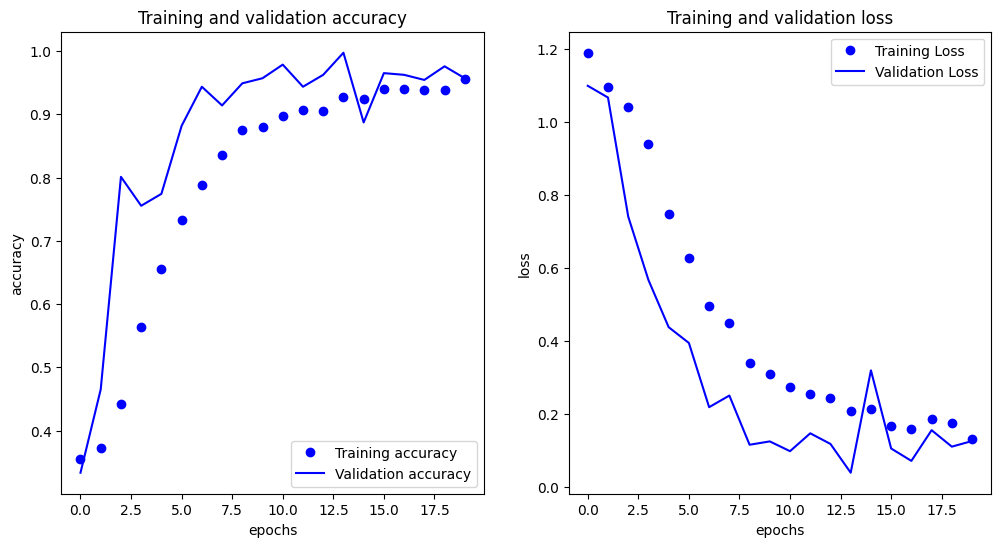

In [ ]:
def plot_loss_acc(history):
  '''Plots the training and validation loss and accuracy from a history object'''
  acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  epochs = range(len(acc))

  fig, ax = plt.subplots(1,2, figsize=(12, 6))
  ax[0].plot(epochs, acc, 'bo', label='Training accuracy')
  ax[0].plot(epochs, val_acc, 'b', label='Validation accuracy')
  ax[0].set_title('Training and validation accuracy')
  ax[0].set_xlabel('epochs')
  ax[0].set_ylabel('accuracy')
  ax[0].legend()

  ax[1].plot(epochs, loss, 'bo', label='Training Loss')
  ax[1].plot(epochs, val_loss, 'b', label='Validation Loss')
  ax[1].set_title('Training and validation loss')
  ax[1].set_xlabel('epochs')
  ax[1].set_ylabel('loss')
  ax[1].legend()

  plt.show()

plot_loss_acc(history)

In [ ]:
import ipywidgets as widgets
from io import BytesIO
import numpy as np
import tensorflow as tf

# Create the widget and display
uploader = widgets.FileUpload(accept="image/*", multiple=True)
display(uploader)
out = widgets.Output()
display(out)

def file_predict(filename, file, out):
    """A function for creating the prediction and printing the output."""
    # Load and preprocess image
    image = tf.keras.utils.load_img(file, target_size=(150, 150))
    image = tf.keras.utils.img_to_array(image)
    image = np.expand_dims(image, axis=0)

    # Run prediction
    prediction = model.predict(image, verbose=0)[0]

    with out:
        print(f'\nmodel output: {prediction}')
        prediction_index = np.argmax(prediction)
        classes = ["paper", "rock", "scissors"]
        predicted_class = classes[prediction_index]
        print(f'{filename} is {predicted_class}')

def on_upload_change(change):
    """A function for getting files from the widget and running the prediction."""
    # change.new is a dict: {filename: {'content': bytes, 'metadata': {...}}}
    for filename, file_info in change.new.items():
        file_jpgdata = BytesIO(file_info['content'])
        file_predict(filename, file_jpgdata, out)

# Attach the handler
uploader.observe(on_upload_change, names='value')


FileUpload(value={}, accept='image/*', description='Upload', multiple=True)

Output()